# Names and IDs
 1. Tomer Lev-Lehman 203458674
 2. Yiftach Savransky 312141369

# I. Condorcet's Jury Theorem (1785)

Assume voter probability be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging)

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers)

Notes: Avoid loops where possible.

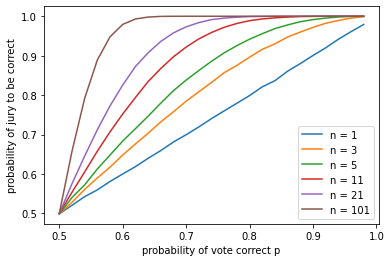

In [ ]:
# Implement here
import matplotlib.pyplot as plt
import random
import numpy as np


repetitions = 100000
n= [1,3,5,11,21, 101]
probs = np.arange(0.5,1,0.02)
for jury_size in n:
  #(repetition,p)
  avg_pr_correct_n = []
  for p in probs:
    votes = np.random.random((jury_size,repetitions))
    correct = votes < p 
    sum_correct = np.sum(correct, axis = 0)
    are_correct = sum_correct > (jury_size/2.0)
    avg_pr_correct = np.mean(are_correct)
    avg_pr_correct_n.append(avg_pr_correct)
  plt.plot(probs,avg_pr_correct_n, label = f"n = {jury_size}")
plt.xlabel("probability of vote correct p")
plt.ylabel("probability of jury to be correct")
plt.legend()
plt.show()

**As number of jury members grows,  $n→∞$ , the jury majority becomes correct  $Pr(correct)→1$ proof:**

Let $n = 2m + 1$ odd number of judges. Let $y,\hat{y} \in\{-1,1\}$. For each judge the probability of being correct is $Pr(\hat{y}=y)=p, p>0.5$. Let $S_n=\Sigma_{i=1}^n\hat{y}_n$ be the sum of the decisions of the judges. if $S_n>0$ then the decision is 1, else -1.
Without loss of generality we assume the true label is $y=1$. 

We will prove that $Pr(S_n>0)$ is monotonicly increasing as n grows. Therefore, when $n→∞$ the jury majority becomes correct  $Pr(correct)→1$.

Assume two more judges added to n. Then the probability to be correct is 

Eq.1 $Pr(S_{n+2}>0)$.
 $Pr(S_{n+2} > 0) = Pr(S_{n} > 2)+ Pr(S_n = 1)(1 − (1 − p)^2) + Pr(S_n = −1)p^2$

This holds because there exists three mutually excllusive options for $S_n$ in which the two added judges can make the prediction correct.

*   $S_n>2$, the two new judges votes do not matter as majority decision correctness is guaranteed.
*   $S_n=1$, at least one of the two new judges needs to be correct for the majority decision to be correct.
* $S_n=-1$, the two new judges need to be correct in order to switch the decision of the majority to be correct.

(note that if $S_n<-1$ the two new judges cannot overturn the wrong ruling)

Note that $Pr(S_n > 2) + Pr(S_n = 1) = Pr(S_n > 0)$ and we can rewrite equation Eq. 1 as:

Eq.2 $Pr(S_{n+2} > 0) − Pr(S_n > 0) = Pr(S_n = −1)p^2 − Pr(Sn = 1)(1 −p)^2$

Therefore, in order to prove we need to show that the series $Pr(S_n)$ is monotonically increasing, i.e. that the right hand side of Eq.2 is positive.

for $n=2m+1$, the following equations holds:
* $Pr(S_n=1) = {{n}\choose{m+1}}p^{m+1}(1-p)^m$ the binominal probability of the majority vote to be decided as 1 by exactly m+1 judges.  
* $Pr(S_n=-1) = {{n}\choose{m}}p^{m}(1-p)^{m+1}$ the binominal probability of the majority vote to be decided as 1 by exactly m judges (m+1 judges voted -1).  
*${{n}\choose{m}}={{n}\choose{n-m}}={{n}\choose{m+1}}$

thus, Eq.2 is equivilant to:

 Eq.3 $Pr(S_{n+2}>0)-Pr(S_{n}>0)={{n}\choose{m}}p^{m+1}(1-p)^{m+1}(2p-1)>0$ when $p>0.5$

Therefore we proved that as n grows the probability of the judges being correct increases. 


(Adapted from Shteingart, Hanan, et al. "Majority Voting and the Condorcet's Jury Theorem." arXiv preprint arXiv:2002.03153 (2020).‏)

# II. AdaBoost
*  receive a method for creating a weak learner, which has a fit and predict methods/
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm with the next parameters:
        - *tol=1e-10, loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train and 1/3 test sets.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function (or your own) to plot the final decision plane of each ensemble model.
## Answer to the next questions:

 1. How does the overall train set accuracy changes with $n$?
 2. Does you model starts to overfit at some point? How can you test and detect such point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`
 2. Explanation you results in text and support it with figures.

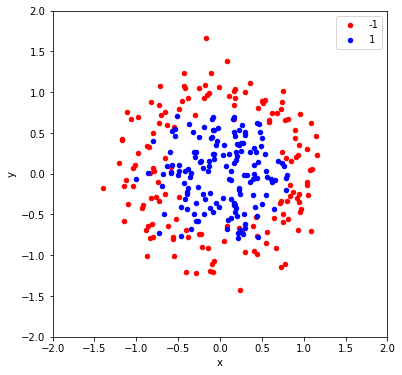

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accept X and return the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


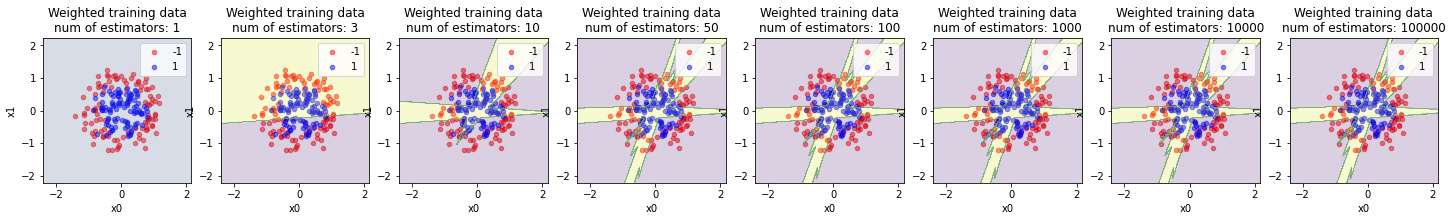

tain_accuracies: [(1, 0.505), (3, 0.57), (10, 0.665), (50, 0.655), (100, 0.655), (1000, 0.655), (10000, 0.655), (100000, 0.655)]
test_accuracies: [(1, 0.49), (3, 0.55), (10, 0.72), (50, 0.72), (100, 0.72), (1000, 0.72), (10000, 0.72), (100000, 0.72)]
actual number of learnears:
[(1, 1), (3, 3), (10, 10), (50, 32), (100, 32), (1000, 32), (10000, 32), (100000, 32)]
max learners: 32


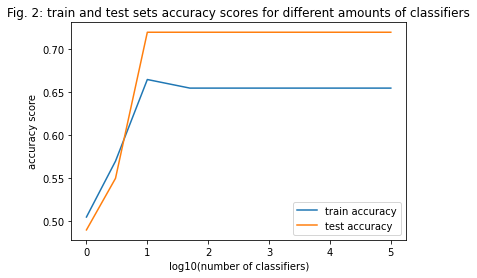

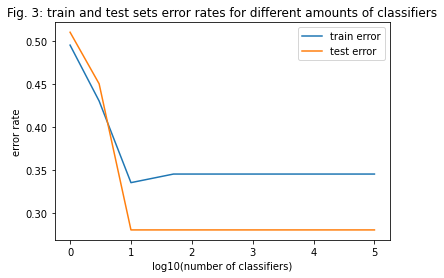

In [ ]:
# Implement here
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import AdaBoostClassifier
from  sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x_train,x_test,y_train, y_test = train_test_split(X,y, test_size=1/3)

def adaBoost(base_learner = LinearSVC(tol=1e-10, loss='hinge', C=1000, max_iter=50000)):
  models = []
  n= [1,3,10,50,100,1000,10000, 100000]
  fig, axs = plt.subplots(1, 8, figsize=(25,10))
  plt.title("Fig. 1")
  for idx,num_of_learners in enumerate(n):
    #ax = fig.add_subplot(100+(idx+1)*10+1)
    classifier = AdaBoostClassifier(n_estimators=num_of_learners,algorithm='SAMME',
                          learning_rate=1,
                          base_estimator=base_learner)
    model = classifier.fit(x_train, y_train)
    plot_data(x_train,y_train, model.predict,axs[idx])
    axs[idx].set_title(f"Weighted training data\nnum of estimators: {num_of_learners}")
    models.append((num_of_learners,model))  
  plt.show()
  return models

def calc_accuracy(x, y, models):
  #len(model.estimators_)
  train_accuracies = [(num_of_learners,accuracy_score(y, model.predict(x))) for num_of_learners,model in models]
  return train_accuracies

models = adaBoost()

tain_accuracies = calc_accuracy(x_train, y_train, models)
print(f"tain_accuracies: {tain_accuracies}")

test_accuracies = calc_accuracy(x_test, y_test, models)
print(f"test_accuracies: {test_accuracies}")

def print_actual_learners_count(models):
  print("actual number of learnears:")
  actual_learners_amount = [(num_of_learners,len(model.estimators_)) for num_of_learners,model in models]
  print(actual_learners_amount)
  return max([i[1] for i in actual_learners_amount])

print("max learners: "+str(print_actual_learners_count(models)))

plt.figure()
plt.plot([np.log10(i[0]) for i in tain_accuracies],[i[1] for i in tain_accuracies], label="train accuracy")
plt.plot([np.log10(i[0]) for i in test_accuracies],[i[1] for i in test_accuracies], label="test accuracy")
plt.xlabel("log10(number of classifiers)")
plt.ylabel("accuracy score")
plt.legend()
plt.title("Fig. 2: train and test sets accuracy scores for different amounts of classifiers")
plt.show()


fig = plt.figure()
plt.plot([np.log10(i[0]) for i in tain_accuracies],[1-i[1] for i in tain_accuracies], label="train error")
plt.plot([np.log10(i[0]) for i in test_accuracies],[1-i[1] for i in test_accuracies], label="test error")
plt.xlabel("log10(number of classifiers)")
plt.ylabel("error rate")
plt.legend()
plt.title("Fig. 3: train and test sets error rates for different amounts of classifiers")
plt.show()
# print("\n".join([str(model[1].estimator_errors_) for model in models]))


In [ ]:
def get_max_anount_of_learners(models):
  print("Maximum amount of learners (the amount chosen by the AdaBoost algorithm by way of early stopping):")
  max_learners = sum(models[-1][1].estimator_errors_ < 1)
  print(max_learners)
  return max_learners
get_max_anount_of_learners(models)


Maximum amount of learners (the amount chosen by the AdaBoost algorithm by way of early stopping):
32


32

# Your answers here

**Ans. 1:**
 
As we can see from Fig.2 the overall train set accuracy grows with $n$ until it is stabelizing at around $n=50$. The AdaBoost algorithm implemented in SKLearn library stops adding classifiers to the ensemble once the accuracy score on the train set stops increasing significantly.
We can see that from $n=50$ and on the actual number of classifiers which are included in the ensemble remains fixed.

**Ans. 2:**

The model DOES NOT starts to overfit at some point. This happens because of the reason mantioned above. The AdaBoost Classifier stops adding learners when their addition does not add additional significant accuracy.

We can test to detect overfitting by using few methods.
If there exists a point in which the train error continues to decrease and the test error increases the model overfitts from that point onwards.
We can visually detect that point by plotting the test set and train set errors. 
As we can see in the above Fig.3 There is no such point in our model.

Another way to try and mitigate overfitting is by conducting Cross-Validation and selecting the model which performed the best. 

**Ans. 3:** 

For this specific task, the optimal number of estimators is chosen by the AdaBoost algorithm. 
using the estimator_errors_ attribute we can retrieve the error rate of every estimator in the ensemble.

AdaBoost chooses to stop enriching the ensemble after k estimators. k can be retrieved using the get_max_anount_of_learners function defined above. 
Moreover, using the print_actual_learners_count function(defined previously) we can see how many learners were used for each n.
